In [189]:
# modeling players shooting darts

import numpy as np
import scipy.stats as stats


# only modeling the x-part
debruyne = [-1.3, -1, 0.5, 0.8, 1, 0.9, -.5]
print(np.mean(debruyne), np.std(debruyne))

fernandes = [-4.3, -2.0, 1.2, 1.5, 2.7, 1.8, -1.2]
print(np.mean(fernandes), np.std(fernandes))

robben = [-5.0, -3.5, -2.5, -3.0, -3.5, -3.2, -2.0]
print(np.mean(robben), np.std(robben))

antony = [-6.0, -5.1, -4.3, -3.0, -3.8, -2.2, 1.7]
print(np.mean(antony), np.std(antony))



0.057142857142857176 0.8957951660909076
-0.04285714285714277 2.334130087485726
-3.242857142857143 0.8764492371530267
-3.242857142857143 2.331680658640362


(30,) (30,)


Text(0.5, 1.0, 'antony')

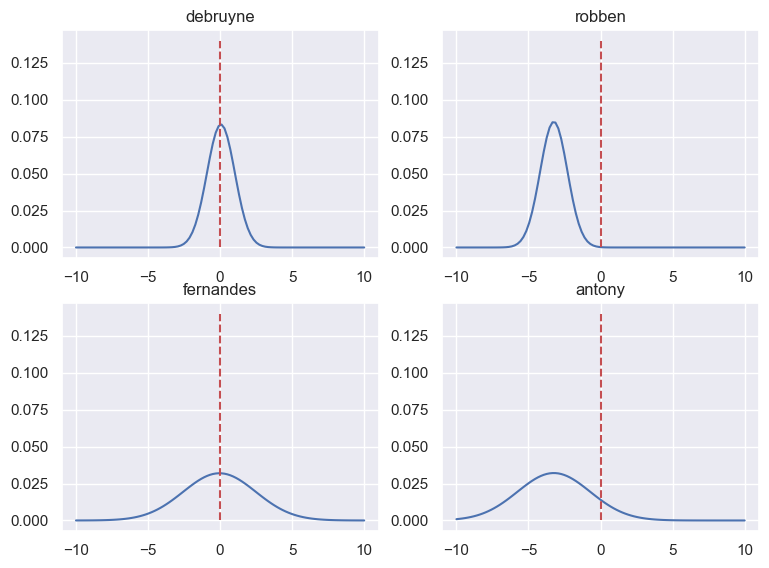

In [2]:
# get mean and unbiased estimate of population std from the samples
import matplotlib.pyplot as plt
import seaborn as sns


sns.set_theme()


player_means = {
    'debruyne': np.mean(debruyne),
    'fernandes': np.mean(fernandes),
    'robben': np.mean(robben),
    'antony': np.mean(antony),
}

player_stds = {
    'debruyne': np.std(debruyne, ddof=1),
    'fernandes': np.std(fernandes, ddof=1),
    'robben': np.std(robben, ddof=1),
    'antony': np.std(antony, ddof=1),
}


# let's draw the normal distributions
x = np.linspace(-10, 10, 100)
prob_dist_player = {}
for player in player_means:
    prob_dist_player[player] = stats.norm.pdf(x, player_means[player], player_stds[player])
    prob_dist_player[player] = prob_dist_player[player] / np.sum(prob_dist_player[player])

fig, axes = plt.subplots(2, 2, figsize=(9, 6.5))
    
x_0 = np.zeros((30,))
y_0 = np.linspace(0, 0.14, 30)

print(x_0.shape, y_0.shape)

axes[0][0].plot(x, prob_dist_player['debruyne'])
axes[0][0].plot(x_0, y_0, 'r--')
axes[0][0].set_title('debruyne')

axes[0][1].plot(x, prob_dist_player['robben'])
axes[0][1].plot(x_0, y_0, 'r--')
axes[0][1].set_title('robben')

axes[1][0].plot(x, prob_dist_player['fernandes'])
axes[1][0].plot(x_0, y_0, 'r--')
axes[1][0].set_title('fernandes')

axes[1][1].plot(x, prob_dist_player['antony'])
axes[1][1].plot(x_0, y_0, 'r--')
axes[1][1].set_title('antony')

debruyne 0.32376971263166365
fernandes 0.12734745427918673
robben 0.0012736497530996208
antony 0.05620135684757222


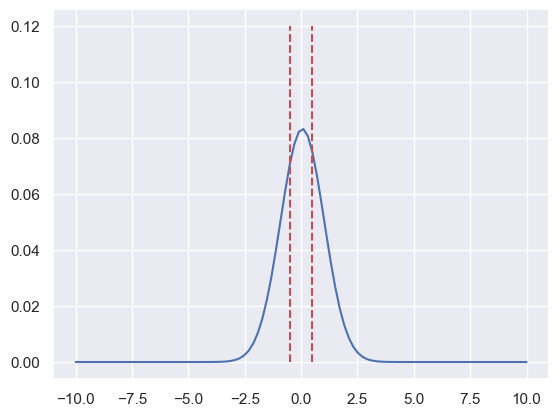

In [4]:
# what is the likelihood that the next shot will be a goal by each player?
# is it P(X = 0)? -> what is this probability? it's zero. 
# model as P(<=0.2 X <= 0.2)


def get_prob_within_bounds(x, y, x_l, x_h):
    prob_sum = 0
    for x_i, y_i in zip(x, y):
        if x_i >= x_l and x_i <= x_h:
            prob_sum += y_i
    return prob_sum


X_l = -0.5
X_h = 0.5
for player, dist in prob_dist_player.items():
    print(player, get_prob_within_bounds(x, dist, X_l, X_h))

x_1 = np.zeros((30,)) + X_l
y_1 = np.linspace(0, 0.12, 30)

x_2 = np.zeros((30,)) + X_h
y_2 = np.linspace(0, 0.12, 30)

plt.plot(x, prob_dist_player['debruyne'])
plt.plot(x_1, y_1, 'r--')
plt.plot(x_2, y_2, 'r--')

In [5]:
# left side probs

print('left side probs')

X_l = -2.5
X_h = -1.5
for player, dist in prob_dist_player.items():
    print(player, get_prob_within_bounds(x, dist, X_l, X_h))


print()
print('right side probs')
X_l = 1.5
X_h = 2.5
for player, dist in prob_dist_player.items():
    print(player, get_prob_within_bounds(x, dist, X_l, X_h))


left side probs
debruyne 0.058736886880839875
fernandes 0.12083188113496361
robben 0.16667194927315523
antony 0.13916604103063088

right side probs
debruyne 0.07287991511847716
fernandes 0.11778369814019686
robben 4.1307022457404217e-07
antony 0.020050156539913953


# Joint distributions

(2, 100)
-0.10374113388259781 1.037035810569885 0.12824115127634617 1.1093379619871506
[-0.10374113  0.12824115]
[[1.08630634 0.03669469]
 [0.03669469 1.24306133]]


(-5.0, 5.0)

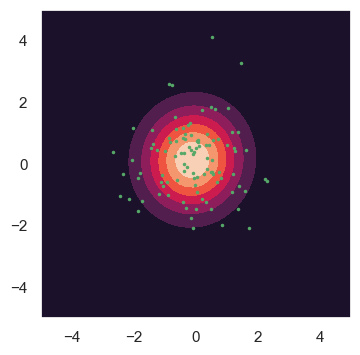

In [123]:
# modeling using multivariate normal distributions

rng = np.random.RandomState(2)

debruyne_xy = np.array([
    rng.randn(100,),
    rng.randn(100,)
])

print(debruyne_xy.shape)

print(
    np.mean(debruyne_xy[0, :]), np.std(debruyne_xy[0, :]),
    np.mean(debruyne_xy[1, :]), np.std(debruyne_xy[1, :])
)

debruyne_cov_matrix = np.cov(debruyne_xy)
debruyne_mean = np.mean(debruyne_xy, axis=1)
print(debruyne_mean)
print(debruyne_cov_matrix)

xx1, xx2 = np.meshgrid(np.linspace(-7, 7, 100), np.linspace(-7, 7, 100), indexing='xy')
pos = np.dstack((xx1, xx2))
rv = stats.multivariate_normal(debruyne_mean, debruyne_cov_matrix)
prob_dist = rv.pdf(pos)
prob_dist /= np.sum(prob_dist)

fig2 = plt.figure(1, figsize=(4, 4))
ax2 = fig2.add_subplot(111)
ax2.contourf(xx1, xx2, prob_dist)
ax2.plot(debruyne_xy[0, :], debruyne_xy[1, :], 'g.', markersize=3)
ax2.set_xlim(-5, 5)
ax2.set_ylim(-5, 5)

### joint dist for independent variables

(-5.0, 5.0)

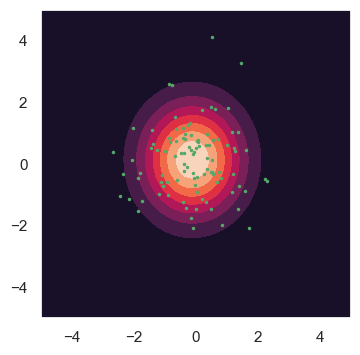

In [119]:
# because debruyne's x position doesn't depend on y and vice versa, we can model the joint distribution by
# simply using the product of 2 distributions

prob_x1 = stats.norm.pdf(xx1, debruyne_mean[0], debruyne_cov_matrix[0][0])
prob_x2 = stats.norm.pdf(xx2, debruyne_mean[1], debruyne_cov_matrix[1][1])

prob_comb = prob_x1 * prob_x2
prob_comb /= np.sum(prob_comb)

fig2 = plt.figure(1, figsize=(4, 4))
ax2 = fig2.add_subplot(111)
ax2.contourf(xx1, xx2, prob_comb)
ax2.plot(debruyne_xy[0, :], debruyne_xy[1, :], 'g.', markersize=3)
ax2.set_xlim(-5, 5)
ax2.set_ylim(-5, 5)

### joint dist for dependent variables # 1

(2, 15)
-1.5799999999999998 2.6209921785461323 -0.5133333333333332 2.0198569806355655
[-1.58       -0.51333333]
[[ 7.36028571 -2.97757143]
 [-2.97757143  4.3712381 ]]


(-7.0, 7.0)

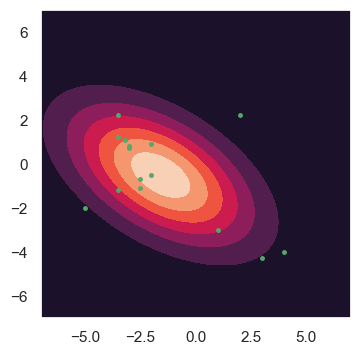

In [121]:
# modeling using multivariate normal distributions

rng = np.random.RandomState(2)

robben_xy = np.array([
    [-5.0, -3.5, -2.5, -3.0, -3.5, -3.2, -2.0, -2.5, -3.5,  1,   2,    3,    4,   -2,  -3],
    [-2.0,  2.2, -1.1,  0.8, -1.2,  1.1,  0.9, -0.7,  1.2, -3.0, 2.2, -4.3, -4.0, -.5, 0.7]
])

print(robben_xy.shape)

print(
    np.mean(robben_xy[0, :]), np.std(robben_xy[0, :]),
    np.mean(robben_xy[1, :]), np.std(robben_xy[1, :])
)

robben_cov_matrix = np.cov(robben_xy)
robben_mean = np.mean(robben_xy, axis=1)
print(robben_mean)
print(robben_cov_matrix)

pos = np.dstack((xx1, xx2))
rv = stats.multivariate_normal(robben_mean, robben_cov_matrix)
prob_dist = rv.pdf(pos)
prob_dist /= np.sum(prob_dist)

fig2 = plt.figure(1, figsize=(4, 4))
ax2 = fig2.add_subplot(111)
ax2.contourf(xx1, xx2, prob_dist)
ax2.plot(robben_xy[0, :], robben_xy[1, :], 'g.', markersize=5)
ax2.set_xlim(-7, 7)
ax2.set_ylim(-7, 7)

### joint dist for dependent variables # 2

(2, 40)
-0.17687217694521734 1.0012852082549313 0.07865115941348129 2.0528442164130625
[-0.17687218  0.07865116]
[[1.02827904 2.09303309]
 [2.09303309 4.322225  ]]


(-5.0, 5.0)

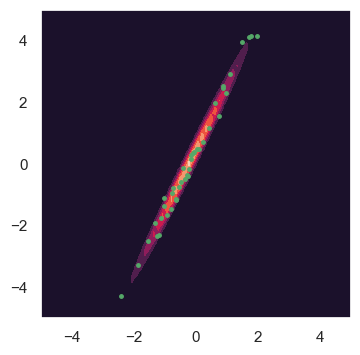

In [122]:
# modeling using multivariate normal distributions

rng = np.random.RandomState(3)

rand_x = rng.randn(40,)
rand_y = 2 * rand_x + 1.0 * rng.rand(40,) # small noise added to avoid computational issues
robben_xy = np.array([
    rand_x,
    rand_y
])

print(robben_xy.shape)

print(
    np.mean(robben_xy[0, :]), np.std(robben_xy[0, :]),
    np.mean(robben_xy[1, :]), np.std(robben_xy[1, :])
)

robben_cov_matrix = np.cov(robben_xy)
robben_mean = np.mean(robben_xy, axis=1)
print(robben_mean)
print(robben_cov_matrix)

pos = np.dstack((xx1, xx2))
rv = stats.multivariate_normal(robben_mean, robben_cov_matrix, allow_singular=True)
prob_dist = rv.pdf(pos)
prob_dist /= np.sum(prob_dist)

fig2 = plt.figure(1, figsize=(4, 4))
ax2 = fig2.add_subplot(111)
ax2.contourf(xx1, xx2, prob_dist)
ax2.plot(robben_xy[0, :], robben_xy[1, :], 'g.', markersize=5)
ax2.set_xlim(-5, 5)
ax2.set_ylim(-5, 5)

(-5.0, 5.0)

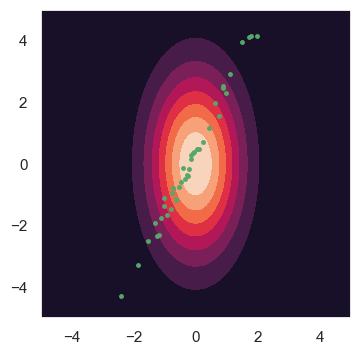

In [139]:
# trying conditional independence

# x = 
prob_x1 = stats.norm.pdf(xx1, 0, 1)
prob_x2 = stats.norm.pdf(xx2 / 2, 0, 1)

prob_comb = prob_x1 * prob_x2
prob_comb /= np.sum(prob_comb)

fig2 = plt.figure(1, figsize=(4, 4))
ax2 = fig2.add_subplot(111)
ax2.contourf(xx1, xx2, prob_comb)
ax2.plot(robben_xy[0, :], robben_xy[1, :], 'g.', markersize=5)
ax2.set_xlim(-5, 5)
ax2.set_ylim(-5, 5)

# Bayesian stats - prior

In [169]:
# prior distribution 

def get_uniform_prior(lower, upper):
    # not normalized
    th = np.linspace(lower, upper, 100)
    th_and_y = {
        th_i: 1 / (upper - lower) if (th_i >= lower and th_i <= upper) else 0.0
        for th_i in th
    }
    return th_and_y




In [216]:
## mean_prior_dist = stats.norm.pdf(x)
mean_prior_dist /= np.sum(mean_prior)


prior_mean_val = 0
prior_std = 0.1


def prob_x_series_for_theta(x, theta, x_std):
    prod = 1
    for x_i in x:
        prod *= stats.norm.pdf(x_i, theta, x_std)
    return prod


def get_x_theta_and_theta_prod(x, theta, x_std):
    return prob_x_series_for_theta(x, theta, x_std) * stats.norm.pdf(theta, prior_mean_val, prior_std)


max_theta = -1
max_prob = -1

x_new = robben
x_new_mean = np.mean(x_new)
x_new_std = np.std(x_new, ddof=1)
print(x_new_mean, x_new_std)

for theta in np.linspace(-4, 4, 1000):
    prob_theta_x = get_x_theta_and_theta_prod(x_new, theta, x_new_std)
    if prob_theta_x > max_prob:
        max_theta = theta
        max_prob = prob_theta_x

max_theta


-3.242857142857143 0.9466733735510238


-0.23623623623623624

In [196]:
np.mean(robben)

-3.242857142857143